In [13]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
import numpy as np  # For numerical operations

# Reading the dataset from a CSV file
df = pd.read_csv('Social_Network_Ads.csv')

# Selecting the feature columns (Age and EstimatedSalary) using iloc
# iloc[:, 2:4] selects all rows and columns from index 2 to 3 (4 is exclusive)
X = df.iloc[:, 2:4]

# Selecting the target column (Purchased) using iloc
# iloc[:, 4] selects all rows and the column at index 4
y = df.iloc[:, 4]

# Displaying the first few rows of the dataframe to understand its structure
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification


# Splitting the dataset into training and test sets
# train_test_split() splits arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming it
# fit_transform() computes the mean and standard deviation on the training data and scales it
X_train = scaler.fit_transform(X_train)

# Transforming the test data using the same scaler
# transform() uses the mean and standard deviation computed from the training data to scale the test data
X_test = scaler.transform(X_test)

# Initializing the K-Nearest Neighbors classifier
# n_neighbors=5 sets the number of neighbors to use
# metric='minkowski' specifies the distance metric to use
# p=2 specifies the power parameter for the Minkowski metric (p=2 is equivalent to Euclidean distance)
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Fitting the classifier to the training data
# fit() trains the KNN classifier using the scaled training data and corresponding labels
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [15]:
from sklearn.metrics import confusion_matrix  # For evaluating the classification performance
# Predicting the target values for the test set
# predict() uses the trained classifier to predict the labels for the test data
y_pred = clf.predict(X_test)

# Computing the confusion matrix to evaluate the classification performance
# confusion_matrix() compares the true labels (y_test) with the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

C:\Users\men_l\AppData\Local\Temp\ipykernel_45152\1823932370.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


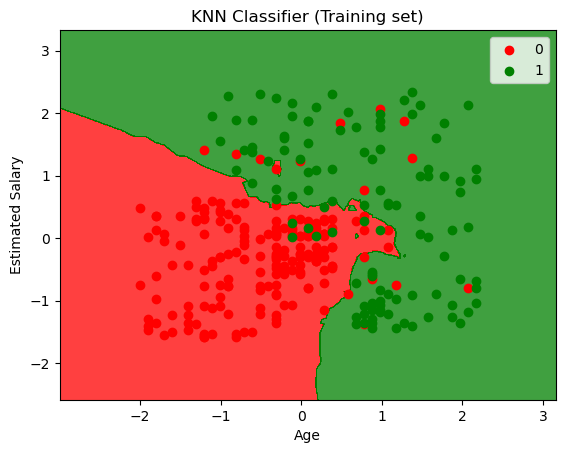

In [18]:
from matplotlib.colors import ListedColormap  # For custom color maps
# Visualizing the decision boundary for the training set
# X_set, y_set are the training data and labels
X_set, y_set = X_train, y_train

# Generating a grid of points with a distance of 0.01 between them
# np.meshgrid() creates a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plotting the decision boundary by classifying each point in the grid
# contourf() creates filled contour plots
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plotting the training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Setting the limits of the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Adding title and labels
plt.title('KNN Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
